In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import tree

In [36]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [37]:
np.random.seed(0)

In [38]:
train_iris = pd.read_csv('data/train_iris.csv', index_col=0)
train_iris.columns = train_iris.columns.str.replace(' ', '_')
train_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [39]:
test_iris = pd.read_csv('data/test_iris.csv', index_col=0)
test_iris.columns = train_iris.columns.str.replace(' ', '_')
test_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [40]:
X_train = train_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_train = train_iris[['species']]
X_test = test_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_test = test_iris[['species']]

scores_data = pd.DataFrame()

In [41]:
# my_tree = tree.DecisionTreeClassifier(X_train, y_train, max_depth=100, random_state=0)
# решение задания
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [42]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                           var_name='set_type', # Имя колонки с ключами
                           value_name='score') #
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<AxesSubplot:xlabel='max_depth', ylabel='score'>

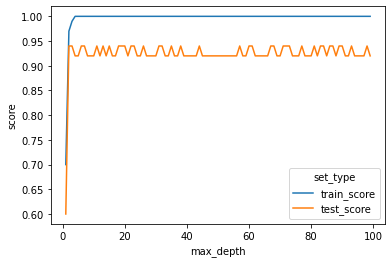

In [43]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)